In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from scipy.sparse import hstack,csr_matrix
def metrics(labels,labels_pred):
   #performance metrics calculation
   precision_train = precision_score(labels,labels_pred)
   recall_train = recall_score(labels,labels_pred)
   f1_train = f1_score(labels,labels_pred)
   return precision_train,recall_train,f1_train

def confusion__matrix(labels,labels_pred):
   # confusion matrix calculation
   confusionmatrix = confusion_matrix(labels,labels_pred)
   return confusion_train

def kNN_classifier(features,labels):
   #kNN classifier
   model = KNeighborsClassifier()
   model.fit(features,labels)
   return model.predict(features)

def main():
    sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')

    #TF-IDF vectorization for categorical for feature extraction
    tfidf_vectorizer = TfidfVectorizer()
    text = tfidf_vectorizer.fit_transform(sentence_data["Text"])

    #numerical data of dataset
    numerical_data = sentence_data.iloc[:,1 :-1].values
    #labels of dataset
    labels = sentence_data['label'].values
    # Combines text features with numerical data
    combined_features = hstack([text,csr_matrix(numerical_data)])
    # Splits the data into training and testing sets
    training_features,testing_features,training_labels,testing_labels = train_test_split(combined_features, labels, test_size=0.3, random_state=42)

    # prediction on traing and testing
    training_labels_pred =kNN_classifier(training_features,training_labels)
    testing_labels_pred = kNN_classifier(testing_features,testing_labels)

    # Confusion matrix
    confusion_train = confusion_matrix(training_labels, training_labels_pred)
    confusion_test = confusion_matrix(testing_labels, testing_labels_pred)

    print("CONFUSION MATRIX OF TRAINING DATA:")
    print(confusion_train)
    #metrics printing
    precision_train,recall_train,f1_train=metrics(training_labels, training_labels_pred)
    print("PERFORMANCE METRICS:")
    #Precision=TP/(TP+FP)
    print(f"PRECISION: {precision_train:.2f}")
    #Recall=TP/(TP+FN)
    print(f"RECALL: {recall_train:.2f}")
    #F1 Score= (2*Precision*Recall)/(Precision+Recall)
    print(f"F1-SCORE: {f1_train:.2f}")
    print(" ")

    print("CONFUSION MATRIX OF TESTING DATA:")
    print(confusion_test)
    #metrics printing
    precision_test,recall_test,f1_test=metrics(testing_labels, testing_labels_pred)
    print("PERFORMANCE METRICS:")
    #Precision=TP/(TP+FP)
    print(f"PRECISION: {precision_test:.2f}")
    #Recall=TP/(TP+FN)
    print(f"RECALL: {recall_test:.2f}")
    #F1 Score= (2*Precision*Recall)/(Precision+Recall)
    print(f"F1-SCORE: {f1_test:.2f}")

if __name__ == "__main__":
    main()


CONFUSION MATRIX OF TRAINING DATA:
[[327   9]
 [ 15 269]]
PERFORMANCE METRICS:
PRECISION: 0.97
RECALL: 0.95
F1-SCORE: 0.96
 
CONFUSION MATRIX OF TESTING DATA:
[[142   1]
 [  9 114]]
PERFORMANCE METRICS:
PRECISION: 0.99
RECALL: 0.93
F1-SCORE: 0.96


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    r2 = r2_score(actual, predicted)
    return mse, rmse, mape, r2

def main():
    # Read CSV file
    IRCTC = pd.read_csv('/home/niya/collegeML/CollegeML/lab2/Lab Session Data(IRCTC Stock Price).csv')
    
    # Convert to numeric
    IRCTC['Predicted_Price'] = pd.to_numeric(IRCTC['Predicted_Price'], errors='coerce')
    IRCTC['Real_Price'] = pd.to_numeric(IRCTC['Real_Price'], errors='coerce')

    # Drop rows with NaN values
    IRCTC.dropna(subset=['Predicted_Price', 'Real_Price'], inplace=True)
    
    # Extract actual and predicted values
    realprice = IRCTC['Real_Price'].values
    assumedprice = IRCTC['Predicted_Price'].values
    
    # Calculate the metrics
    mse, rmse, mape, r2 = calculate_metrics(realprice, assumedprice)
    
    print("METRICS:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")
    print(f"R2 Score: {r2:.2f}")

if __name__ == "__main__":
    main()


KeyError: 'Predicted_Price'

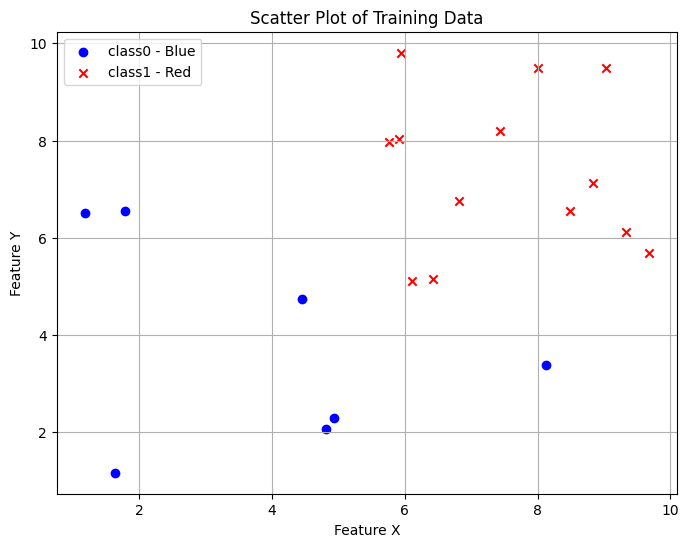

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plotting(X_train, Y_train, classes):
    # Creates a scatter plot for the training data
    # Sets the figure size
    plt.figure(figsize=(8, 6))
    # Ploting points for class 0
    plt.scatter(X_train[classes == 0], Y_train[classes == 0], color='blue', label='class0 - Blue', marker='o')
    # Ploting points for class 1
    plt.scatter(X_train[classes == 1], Y_train[classes == 1], color='red', label='class1 - Red', marker='x')
    # labeling
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Set random seed makes the same random numbers generated every time the program is run
    np.random.seed(0)
    # Generates random values for X and Y features between 1 and 10
    X_feature = np.random.uniform(1, 10, 20)
    Y_feature = np.random.uniform(1, 10, 20)

    # Classifies points: class 1 if both X and Y > 5, otherwise class 0
    classes = np.where(((Y_feature > 5) & (X_feature > 5)), 1, 0)

    plotting(X_feature, Y_feature, classes)

if __name__ == "__main__":
    main()


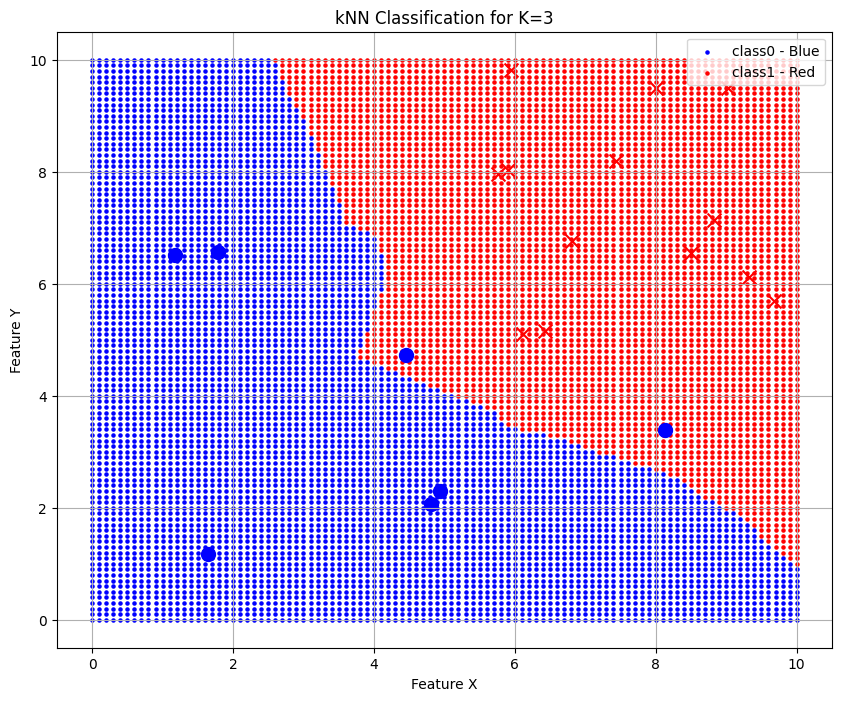

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def plot_with_knn_predicted_values(train_data, test_data, predicted_classes, classes):
    # Creates a plot to visualize training data, test data, and predicted classes
    plt.figure(figsize=(10, 8))

    # Ploting predicted test data points for class 0
    plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1], color='blue', label='class0 - Blue', s=5)

    # Ploting predicted test data points for class 1
    plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1], color='red', label='class1 - Red', s=5)

    # Ploting original training data points for class 0
    plt.scatter(train_data[classes == 0][:, 0], train_data[classes == 0][:, 1], color='blue', marker='o', s=100)

    # Ploting original training data points for class 1
    plt.scatter(train_data[classes == 1][:, 0], train_data[classes == 1][:, 1], color='red', marker='x', s=100)

    #labeling
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("kNN Classification for K=3")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

def kNN_classifier(train_data, test_data, classes):
   # Initializes the kNN classifier with k=3
   model = KNeighborsClassifier(n_neighbors=3)
   # Fits the model on training data
   model.fit(train_data, classes)
   # Predicts the classes for the test data
   return model.predict(test_data)

def main():
    # Set random seed makes the same random numbers generated every time the program is run
    np.random.seed(0)

    # Generates random X and Y features between 1 and 10
    X_feature = np.random.uniform(1, 10, 20)
    Y_feature = np.random.uniform(1, 10, 20)

    # Classifies points: class 1 if both X and Y > 5, otherwise class 0
    classes = np.where(((X_feature > 5) & (Y_feature > 5)), 1, 0)

    # Defines feature range for X and Y from 0 to 10 with step size 0.1
    X_feature_range = np.arange(0, 10.1, 0.1)
    Y_feature_range = np.arange(0, 10.1, 0.1)

    # Creates a meshgrid from the feature ranges
    X_test, Y_test = np.meshgrid(X_feature_range, Y_feature_range)

    # Flattens the meshgrid into 1D arrays
    X_feature_test_flat = X_test.ravel()
    Y_feature_test_flat = Y_test.ravel()

    # Combineing the flattened X and Y arrays into a single test dataset
    test_data = np.c_[X_feature_test_flat, Y_feature_test_flat]

    # Combining X and Y feature arrays into a single training dataset
    train_data = np.c_[X_feature, Y_feature]

    # Predicts the classes for the test data using the kNN classifier
    predicted_classes = kNN_classifier(train_data, test_data, classes)

    # Ploting the training data and predicted test data
    plot_with_knn_predicted_values(train_data, test_data, predicted_classes, classes)

if __name__ == "__main__":
    main()


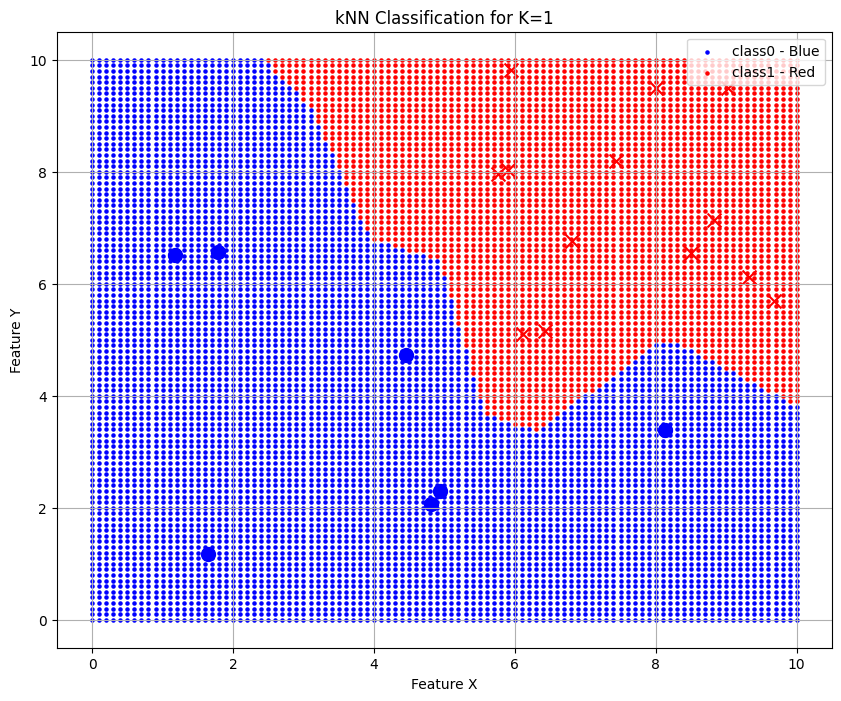

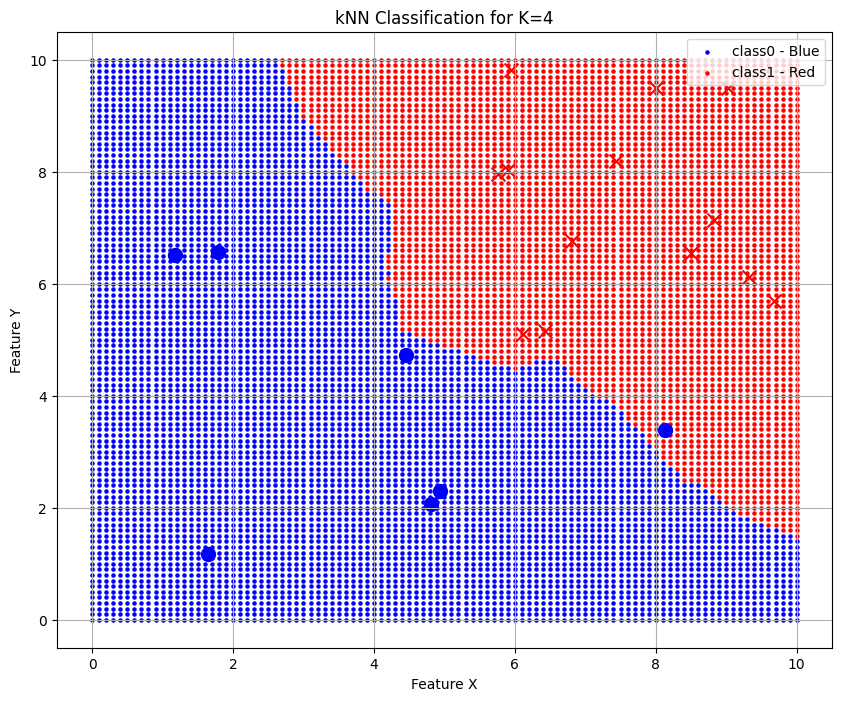

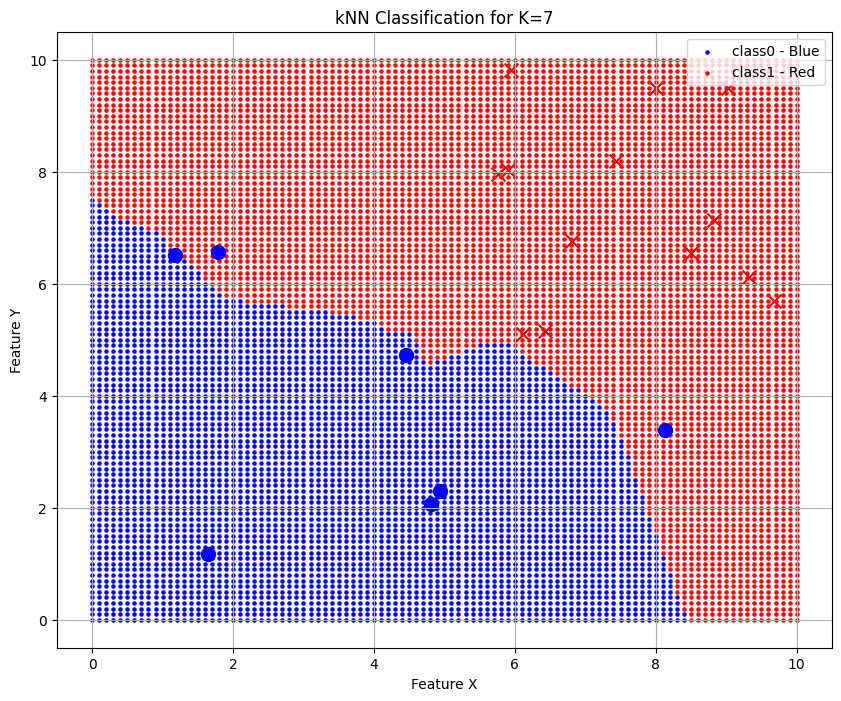

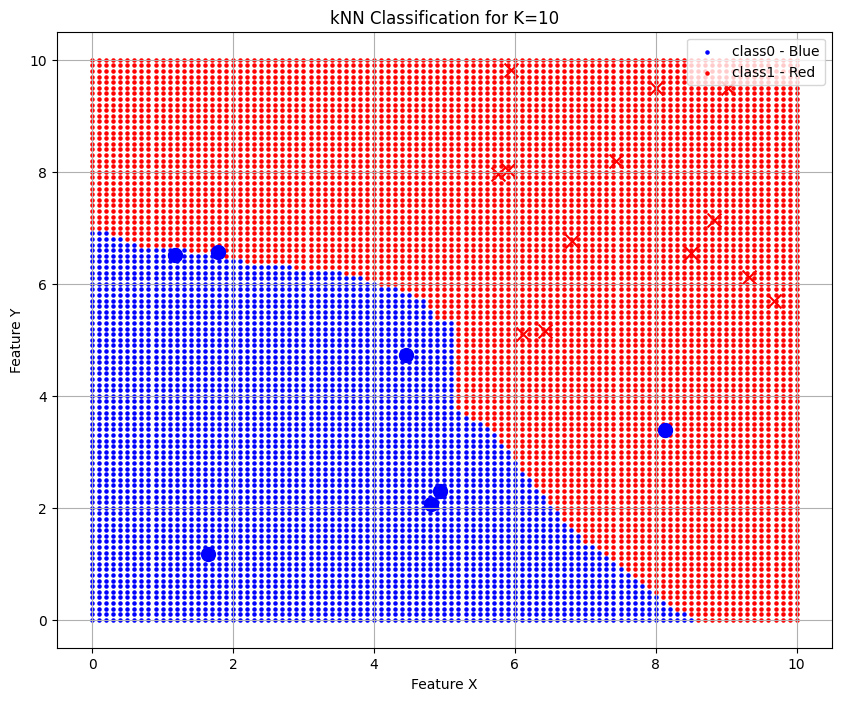

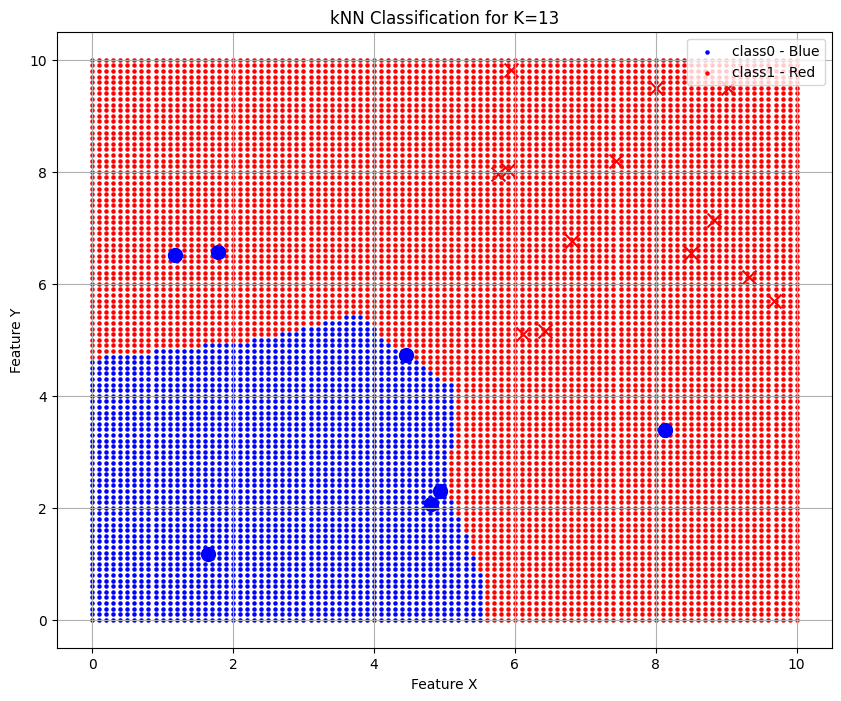

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def plot_with_knn_predicted_values(train_data, test_data, k, classes):
    # Initializes kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fits the kNN model to the training data
    knn.fit(train_data, classes)
    # Predicts the class labels for the test data
    predicted_classes = knn.predict(test_data)
    plt.figure(figsize=(10, 8))

    # Plots predicted test data points for class 0
    plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1], color='blue', label='class0 - Blue', s=5)

    # Plots predicted test data points for class 1
    plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1], color='red', label='class1 - Red', s=5)

    # Plots original training data points for class 0
    plt.scatter(train_data[classes == 0][:, 0], train_data[classes == 0][:, 1], color='blue', marker='o', s=100)

    # Plots original training data points for class 1
    plt.scatter(train_data[classes == 1][:, 0], train_data[classes == 1][:, 1], color='red', marker='x', s=100)

    #labeling
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("kNN Classification for K=" + str(k))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

def main():
     # Set random seed makes the same random numbers generated every time the program is run
    np.random.seed(0)
    # Generates random X and Y features between 1 and 10
    X_feature = np.random.uniform(1, 10, 20)
    Y_feature = np.random.uniform(1, 10, 20)

    # Classifies points: class 1 if both X and Y > 5, otherwise class 0
    classes = np.where(((X_feature > 5) & (Y_feature > 5)), 1, 0)

    # Defines feature range for X and Y from 0 to 10 with step size 0.1
    X_feature_range = np.arange(0, 10.1, 0.1)
    Y_feature_range = np.arange(0, 10.1, 0.1)

    # Creates a meshgrid from the feature ranges
    X_test, Y_test = np.meshgrid(X_feature_range, Y_feature_range)

    # Flattens the meshgrid into 1D arrays
    X_feature_test_flat = X_test.ravel()
    Y_feature_test_flat = Y_test.ravel()

    # Combines the flattened X and Y arrays into a single test dataset
    test_data = np.c_[X_feature_test_flat, Y_feature_test_flat]

    # Combines X and Y feature arrays into a single training dataset
    train_data = np.c_[X_feature, Y_feature]

    # Looping through various k values from 1 to 15 in steps of 3 and plot the results
    for k in range(1, 16, 3):
        plot_with_knn_predicted_values(train_data, test_data, k, classes)

if __name__ == "__main__":
    main()


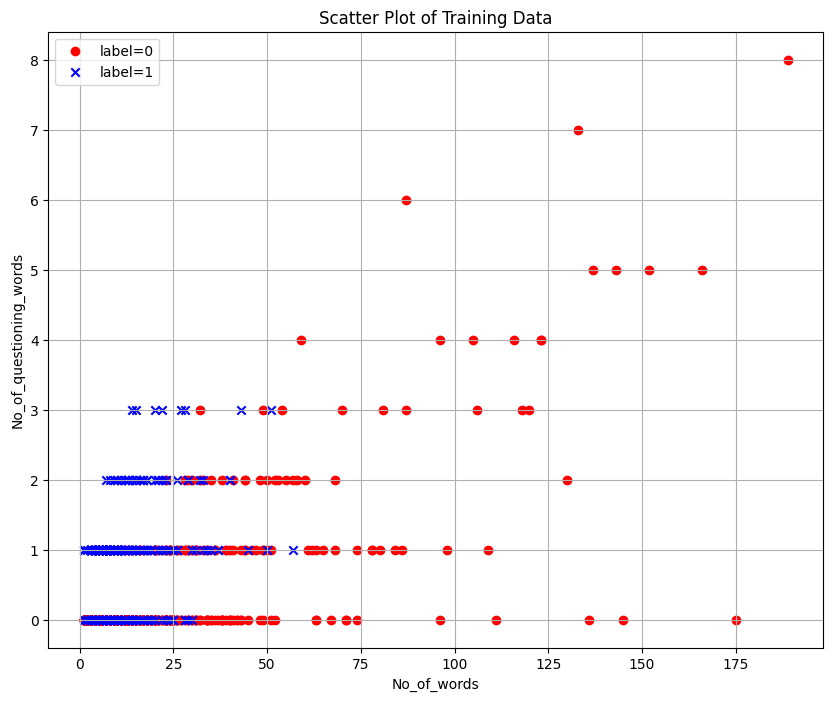

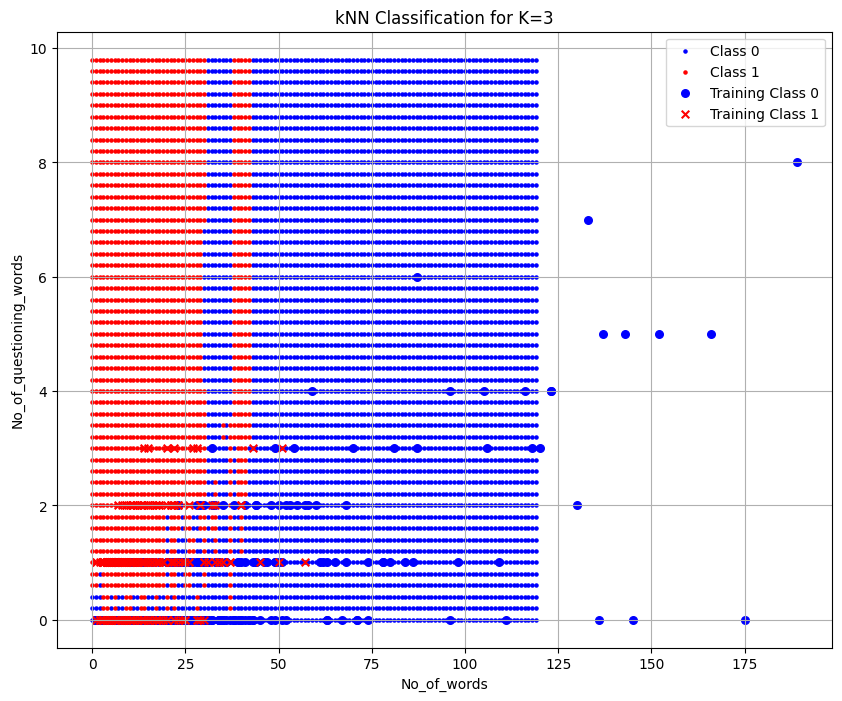

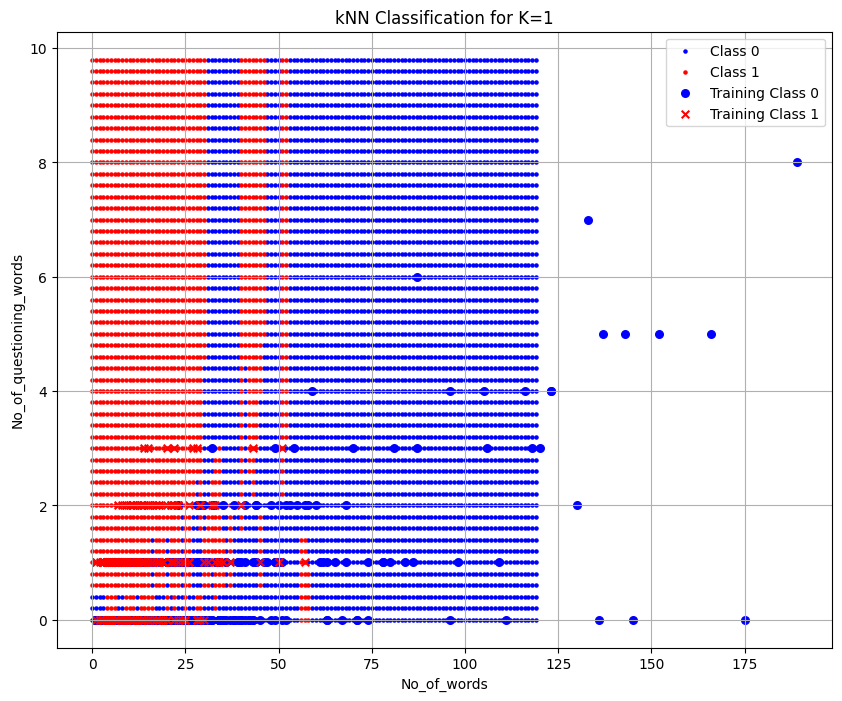

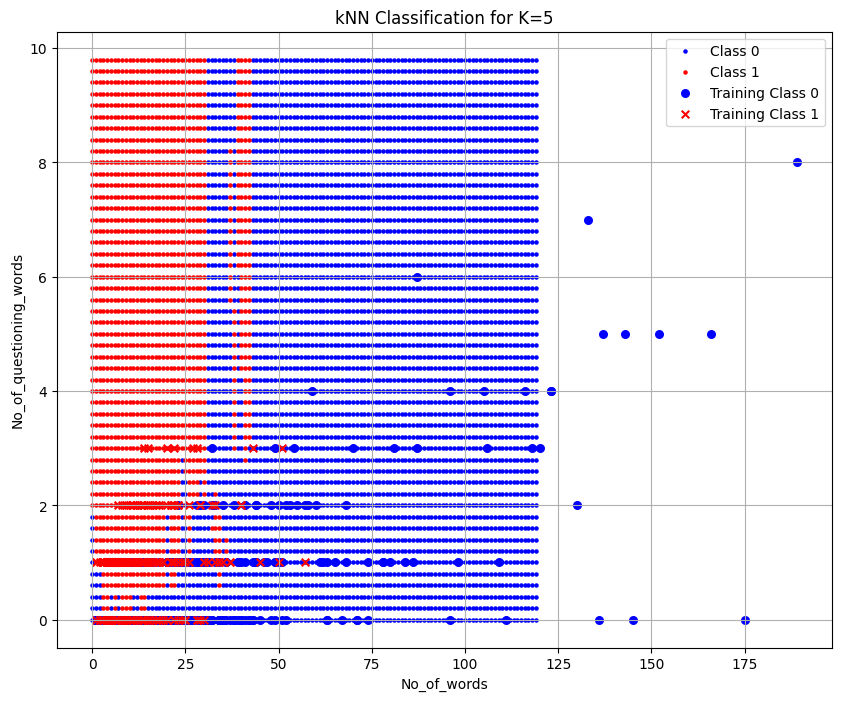

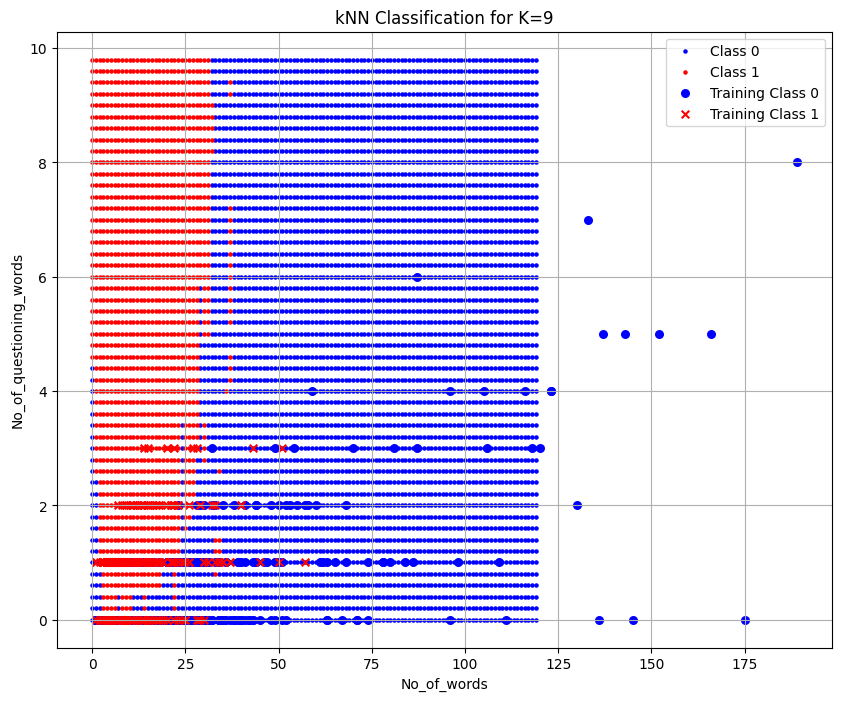

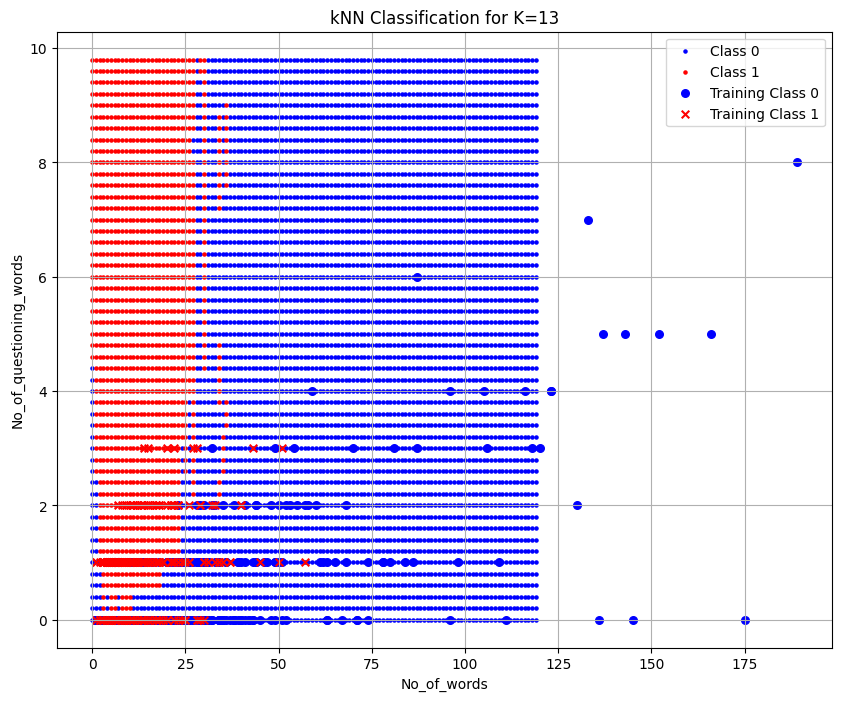

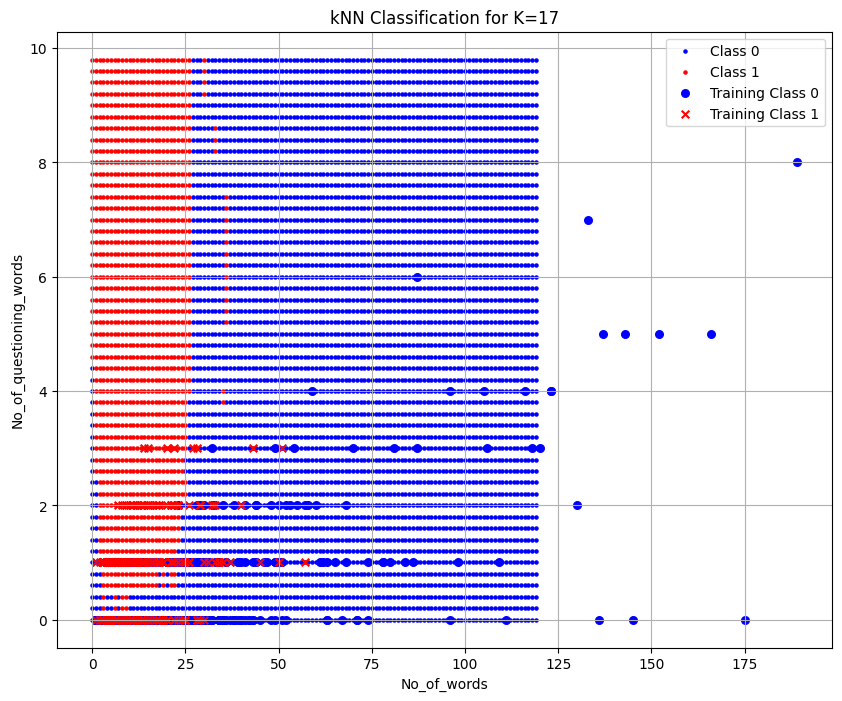

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def plot_features(question_labels, answer_labels):
    # Plotting scatter plot for training data
    plt.figure(figsize=(10, 8))

    # Plotting question data points
    plt.scatter(question_labels['No_of_words'], question_labels['No_of_questoning_words'],color='red', label='label=0', marker='o')

    # Plotting answer data points
    plt.scatter(answer_labels['No_of_words'], answer_labels['No_of_questoning_words'], color='blue', label='label=1', marker='x')

    # labeling
    plt.title('Scatter Plot of Training Data')
    plt.xlabel('No_of_words')
    plt.ylabel('No_of_questioning_words')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_with_knn_predicted_values(X_Y_features, labels, k):
    # Generates a grid of test data points for prediction
    # Range for 'No_of_words'
    X_range = np.arange(0, 120, 1)
    # Range for 'No_of_questoning_words'
    Y_range = np.arange(0, 10, 0.2)
    X_test, Y_test = np.meshgrid(X_range, Y_range)

    # Flattens the meshgrid into 1D arrays for test data
    X_test_flat = X_test.ravel()
    Y_test_flat = Y_test.ravel()

    # Combines the flattened X and Y arrays to create test data
    test_data = np.c_[X_test_flat, Y_test_flat]

    # Initializes and fit kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Y_features, labels)

    # Predicts class labels for the generated test data
    predicted_classes = knn.predict(test_data)

    # Ploting the classification results
    plt.figure(figsize=(10, 8))

    # Ploting predicted class 0 test data points i.e questions
    plt.scatter(test_data[predicted_classes == 0][:, 0], test_data[predicted_classes == 0][:, 1], color='blue', label='Class 0', s=5)

    # Ploting predicted class 1 test data points i.e answers
    plt.scatter(test_data[predicted_classes == 1][:, 0], test_data[predicted_classes == 1][:, 1], color='red', label='Class 1', s=5)

    # Ploting training data for class 0 i.e questions
    plt.scatter(X_Y_features[labels == 0][:, 0], X_Y_features[labels == 0][:, 1], color='blue', marker='o', s=30, label='Training Class 0')

    # Ploting training data for class 1 i.e answers
    plt.scatter(X_Y_features[labels == 1][:, 0], X_Y_features[labels == 1][:, 1], color='red', marker='x', s=30, label='Training Class 1')

    # labeling
    plt.xlabel("No_of_words")
    plt.ylabel("No_of_questioning_words")
    plt.title("kNN Classification for K=" + str(k))
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

def main():
    sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')

    # Splits the data into question and answer labels based on 'label' column
    question_labels = sentence_data[sentence_data['label'] == 0]
    answer_labels = sentence_data[sentence_data['label'] == 1]

    # Plots the features for questions and answers
    plot_features(question_labels, answer_labels)

    # Extracts feature columns X= No_of_words, Y= No_of_questoning_words
    X_Y_features = sentence_data[['No_of_words', 'No_of_questoning_words']].values

    #Extracts labels
    labels = sentence_data['label'].values

    # Plots kNN classifier results with k=3
    plot_with_knn_predicted_values(X_Y_features, labels, 3)

    # Plots kNN classifier results for various k values
    for k in range(1, 20, 4):
        plot_with_knn_predicted_values(X_Y_features, labels, k)

if __name__ == "__main__":
    main()

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

def Best_k_value(X_train, Y_train):
    # Defines the k values to search for the best k
    param_grid = {
        'n_neighbors': np.arange(1, 21)  # Possible k values from 1 to 20
    }

    # Initializes kNN classifier
    knn = KNeighborsClassifier()
    # GridSearchCV to find the best k value
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    # Fits the grid search on training data
    grid_search.fit(X_train, Y_train)

    # Extracts the best k value and the corresponding best score
    best_k = grid_search.best_params_['n_neighbors']
    best_score = grid_search.best_score_

    return best_k, best_score

def main():
    file_path = '/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx'
    sentence_data = pd.read_excel(file_path)

    # TF-IDF vectorization for the 'Text' column to convert it into numerical form
    tfidf_vectorizer = TfidfVectorizer()
    text_features = tfidf_vectorizer.fit_transform(sentence_data['Text'])

    # Extracting numerical features: No_of_words, No_of_questoning_words, Has_Question_Mark
    numerical_features = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']].values

    # Combining text features and numerical features into one feature matrix
    combined_features = hstack([text_features, csr_matrix(numerical_features)])

    # Extracting labels
    labels = sentence_data['label'].values

    # Splitting the data into training and testing sets with 7:3 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(combined_features, labels, test_size=0.3, random_state=42)

    # Finding the best k value using GridSearchCV
    best_k, best_score = Best_k_value(X_train, Y_train)

    # Prints the best k value and the corresponding accuracy score
    print(f"Best k value: {best_k}")
    print(f"Best cross-validated accuracy score: {best_score:.2f}")

if __name__ == "__main__":
    main()


Best k value: 3
Best cross-validated accuracy score: 0.94
